# Plane Crash Severity Prediction

**This kernel is related to a problem statement on Hackerearth on Plane crash Severity Production.**

## The Problem Statement

**Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.**

## The Dataset

The dataset comprises 3 files: 

Train.csv: [10000 x 12 excluding the headers] contains Training data

Test.csv: [2500 x 11 excluding the headers] contains Test data

sample_submission.csv: contains a sample of the format in which the Results.csv needs to be

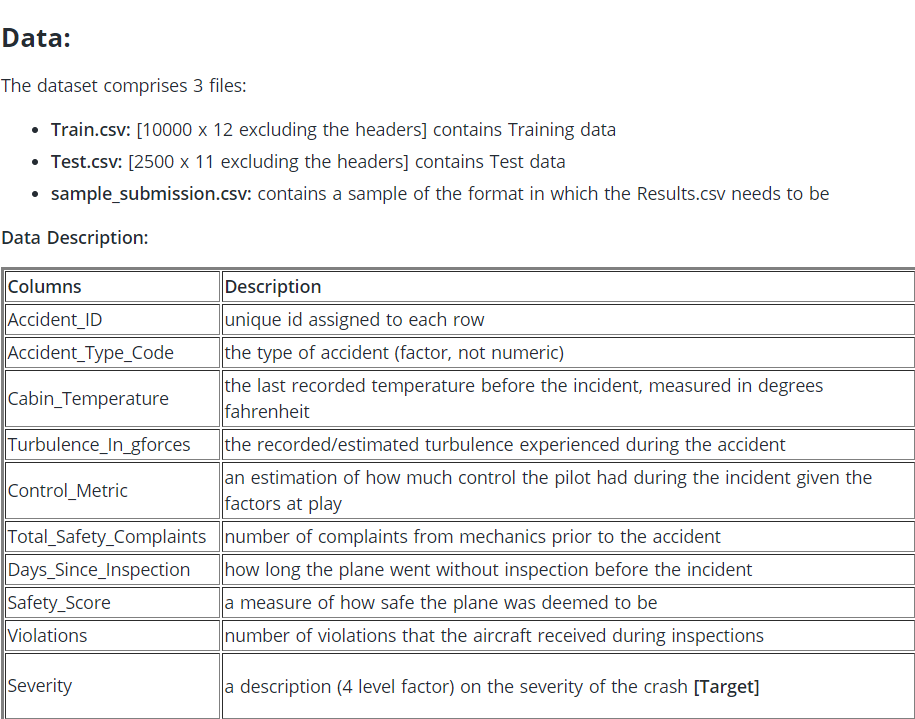

In [1]:
from IPython.display import Image
Image(filename= "../input/feature-decp-img/Feature_Description.png", height=700, width=700)

**Here Severity is our Target Variable**

## Evaluation Criteria

$$score = {100 * (f1\_score(actual\_values, predicted\_values, average='weighted'))}$$

## The Leaderboard top 1% Approach

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=12

*Loading all the important libraries*

In [3]:
train = pd.read_csv('../input/data-for-flight-crash-severity-prediction/train.csv')
test = pd.read_csv('../input/data-for-flight-crash-severity-prediction/test.csv')

train.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [5]:
train.describe(include='all')

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Highly_Fatal_And_Damaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,NaN,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,NaN,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,NaN,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,NaN,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,NaN,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000


In [6]:
X = train.drop(columns=['Accident_ID', 'Severity'])
y = train.Severity
y.map({'Minor_Damage_And_Injuries' : 0, 'Significant_Damage_And_Serious_Injuries' : 1, 
      'Significant_Damage_And_Fatalities' : 2,  'Highly_Fatal_And_Damaging' : 3})

0       0
1       0
2       2
3       1
4       2
       ..
9995    1
9996    3
9997    1
9998    0
9999    3
Name: Severity, Length: 10000, dtype: int64

In [7]:
print('Percentage of each class in Target Variable \n')
print((train.Severity.value_counts()/len(train))*100)

Percentage of each class in Target Variable 

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64


**Here we infer that train and test have similar distribution but the dataset is imbalanced and Accident_type_code is categorical. Ordinal Classification is definitely worth trying for this.**

## The Random Forest Baseline and Learning Curves

In [8]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=10, max_features=0.5 , bootstrap=False)
cross_val_score(rfc, X, y, cv=4, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   12.7s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.9s finished


0.9541104192972657

[learning_curve] Training set sizes: [2250 2625 2999 3374 3749 4124 4499 4874 5250 5624 5999 6374 6749 7125]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.7min finished


(Text(0.5, 0, 'No.of Examples Used'), Text(0, 0.5, 'Score'))

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


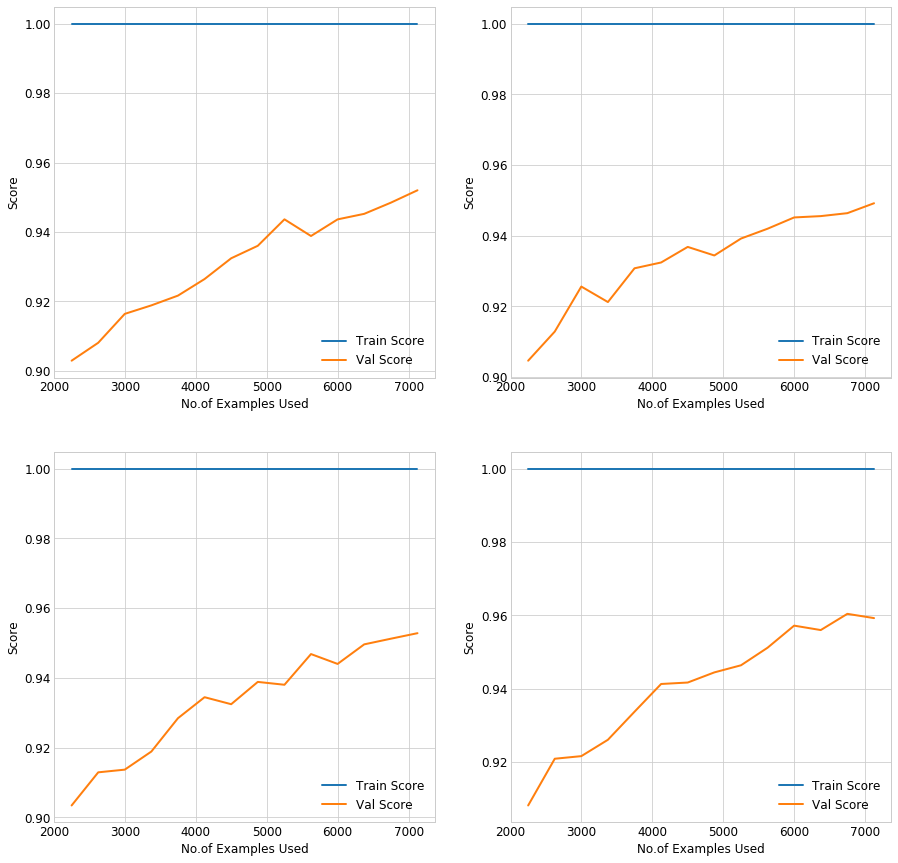

In [9]:
train_sizes_abs, train_scores, val_scores = learning_curve(rfc, X, y, train_sizes=np.arange(0.3, 1, 0.05), n_jobs=-1, cv=4, 
                                                           scoring='f1_weighted', random_state=2, verbose=1)
fig, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0, 0].plot(train_sizes_abs, train_scores[:, 0], label='Train Score')
axes[0, 0].plot(train_sizes_abs, val_scores[:, 0], label='Val Score')
axes[0, 1].plot(train_sizes_abs, train_scores[:, 1], label='Train Score')
axes[0, 1].plot(train_sizes_abs, val_scores[:, 1], label='Val Score')
axes[1, 0].plot(train_sizes_abs, train_scores[:, 2], label='Train Score')
axes[1, 0].plot(train_sizes_abs, val_scores[:, 2], label='Val Score')
axes[1, 1].plot(train_sizes_abs, train_scores[:, 3], label='Train Score')
axes[1, 1].plot(train_sizes_abs, val_scores[:, 3], label='Val Score')

axes[0, 0].legend(), axes[1, 0].legend(), axes[0, 1].legend(), axes[1, 1].legend()
axes[0, 0].set_xlabel("No.of Examples Used"), axes[0, 0].set_ylabel("Score")
axes[0, 1].set_xlabel("No.of Examples Used"), axes[0, 1].set_ylabel("Score")
axes[1, 0].set_xlabel("No.of Examples Used"), axes[1, 0].set_ylabel("Score")
axes[1, 1].set_xlabel("No.of Examples Used"), axes[1, 1].set_ylabel("Score")

 ##### *Inference: This is clearly a fully tuned random forest overfitting the data*

## EDA Time

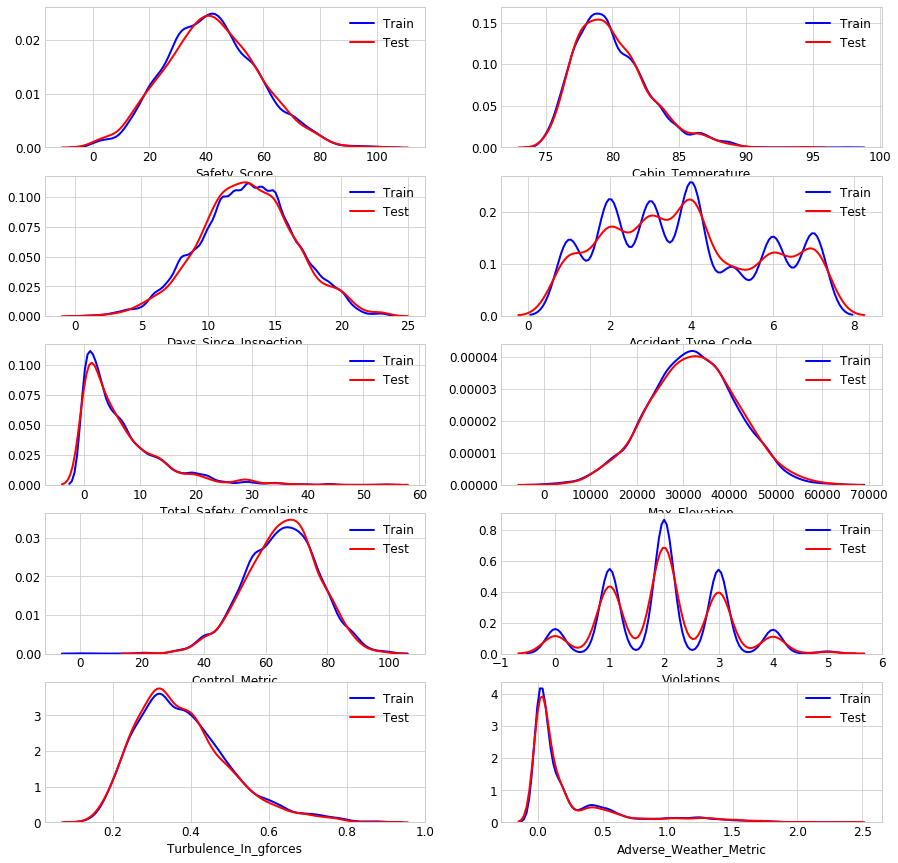

In [10]:
f, ax = plt.subplots(5, 2, figsize=(15,15))

for i in range(5):
    sns.distplot(X.iloc[:, i], color="b", bins=20, hist_kws=dict(alpha=1), hist=False, label='Train', ax=ax[i, 0] )
    sns.distplot(test.iloc[:, i], color="r", bins=20, hist_kws=dict(alpha=1), hist=False, label='Test', ax=ax[i, 0])
    plt.legend()
for i in range(5):
    sns.distplot(X.iloc[:, i+5], color="b", bins=20, hist_kws=dict(alpha=1), hist=False, label='Train', ax=ax[i, 1] )
    sns.distplot(test.iloc[:, i+5], color="r", bins=20, hist_kws=dict(alpha=1), hist=False, label='Test', ax=ax[i, 1])
    plt.legend()

##### Infernece: Train and Test have the same distribution so random spliting of data is the right strategy for cross-validation.

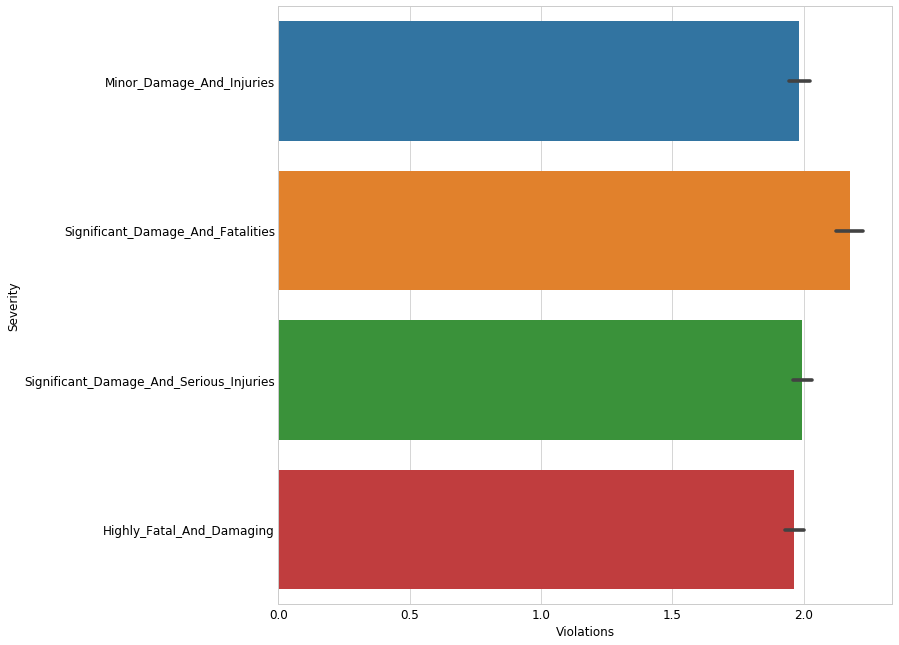

In [11]:
f, ax = plt.subplots(1, 1, figsize=(11,11))
sns.barplot(X.Violations, y, ax=ax)
plt.legend()

##### Inference: feature-> more than 2 violations

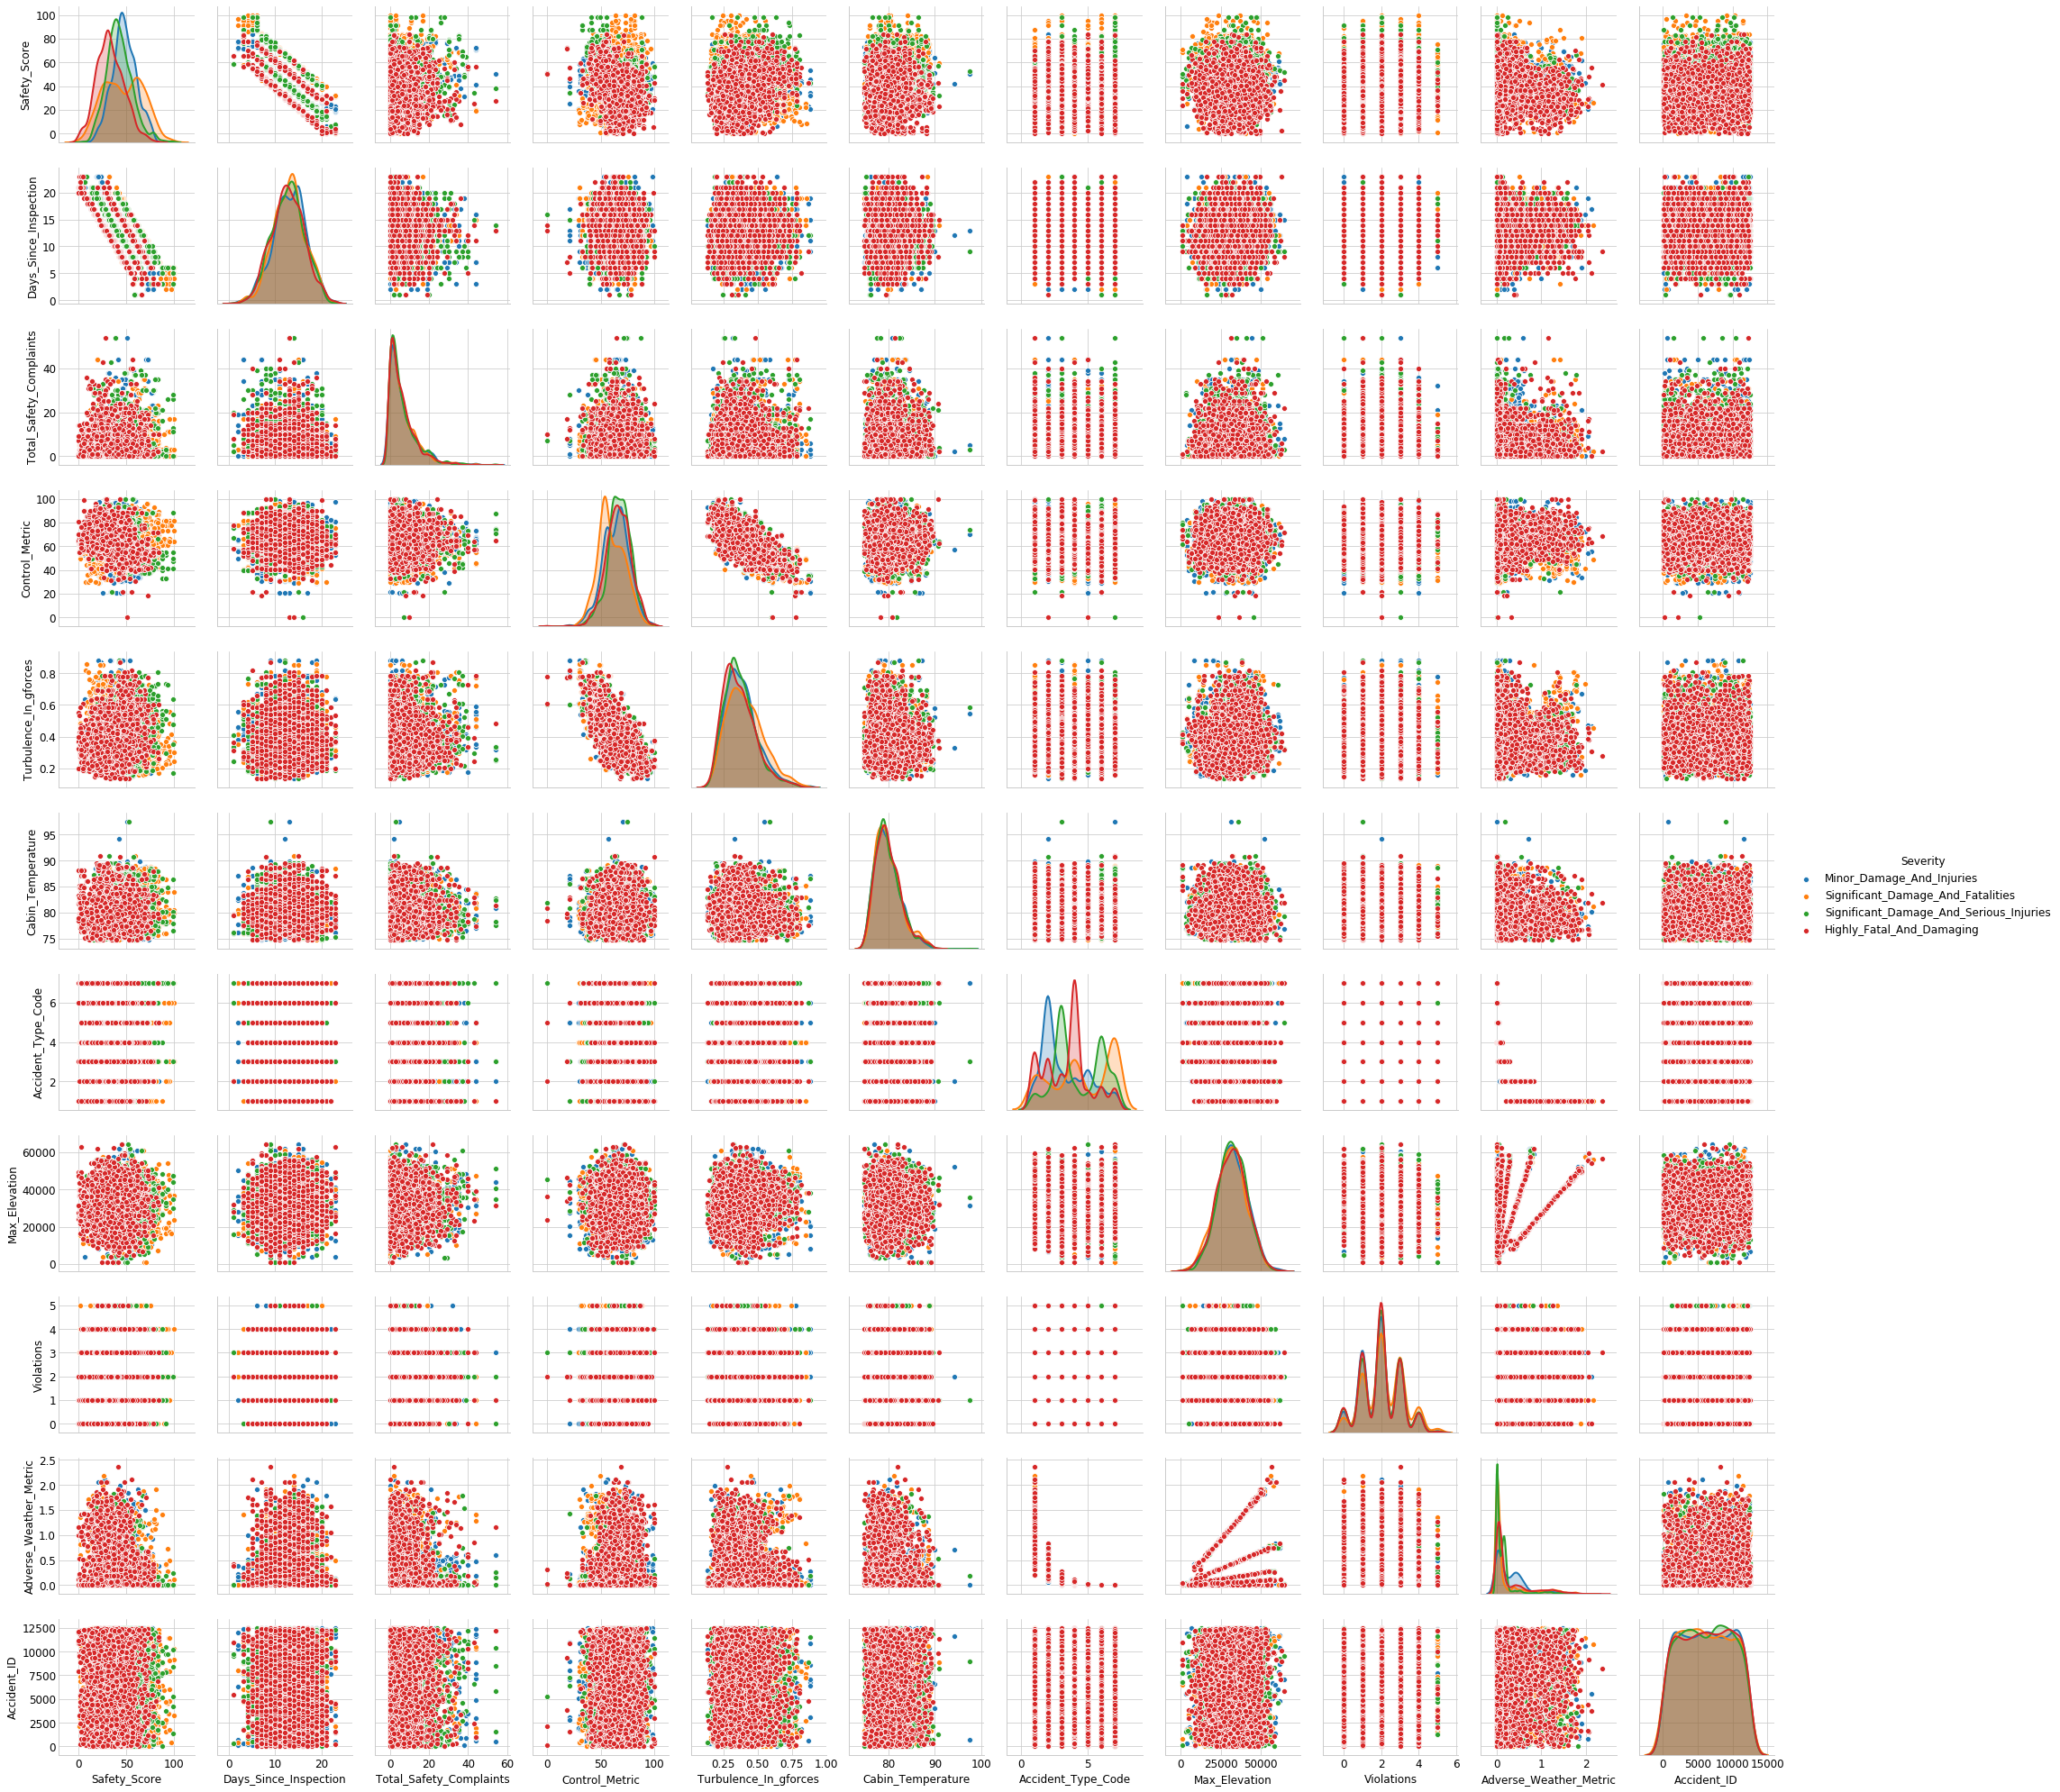

In [12]:
sns.pairplot(train, hue="Severity")

##### Relations Worth Exploring 
##### 1) Safety_score and Days_since_inspection
##### 2) Explore adverse_weather_metric and Accident type_code
##### 3) adverse weather metric and Max_elevation
##### 4) Turbulence_In_gforces and Control_Metric

In [13]:
y = train.Severity
y = y.str.replace('Minor_Damage_And_Injuries', '0').str.replace('Significant_Damage_And_Serious_Injuries', '1').str.replace('Significant_Damage_And_Fatalities', '2').str.replace('Highly_Fatal_And_Damaging', '3').astype(int)
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity
Safety_Score,1,-0.69,0.058,0.00056,0.02,0.033,0.17,0.0045,0.042,-0.11,-0.31
Days_Since_Inspection,-0.69,1,-0.032,-0.012,-0.0016,-0.039,-0.025,0.00018,-0.017,0.041,-0.033
Total_Safety_Complaints,0.058,-0.032,1,-0.02,0.066,0.014,0.035,0.037,-0.019,-0.0027,-0.027
Control_Metric,0.00056,-0.012,-0.02,1,-0.64,-0.0083,0.0084,-0.028,-0.0033,-0.028,0.014
Turbulence_In_gforces,0.02,-0.0016,0.066,-0.64,1,0.011,-0.0076,0.048,0.013,0.04,-0.032
Cabin_Temperature,0.033,-0.039,0.014,-0.0083,0.011,1,0.031,-0.0092,0.019,-0.027,0.019
Accident_Type_Code,0.17,-0.025,0.035,0.0084,-0.0076,0.031,1,0.02,0.046,-0.74,0.019
Max_Elevation,0.0045,0.00018,0.037,-0.028,0.048,-0.0092,0.02,1,-0.031,0.17,-0.019
Violations,0.042,-0.017,-0.019,-0.0033,0.013,0.019,0.046,-0.031,1,-0.022,0.0046
Adverse_Weather_Metric,-0.11,0.041,-0.0027,-0.028,0.04,-0.027,-0.74,0.17,-0.022,1,0.03


##### Inference: You can Analyse Features worth dropping by checking their correlation with target.

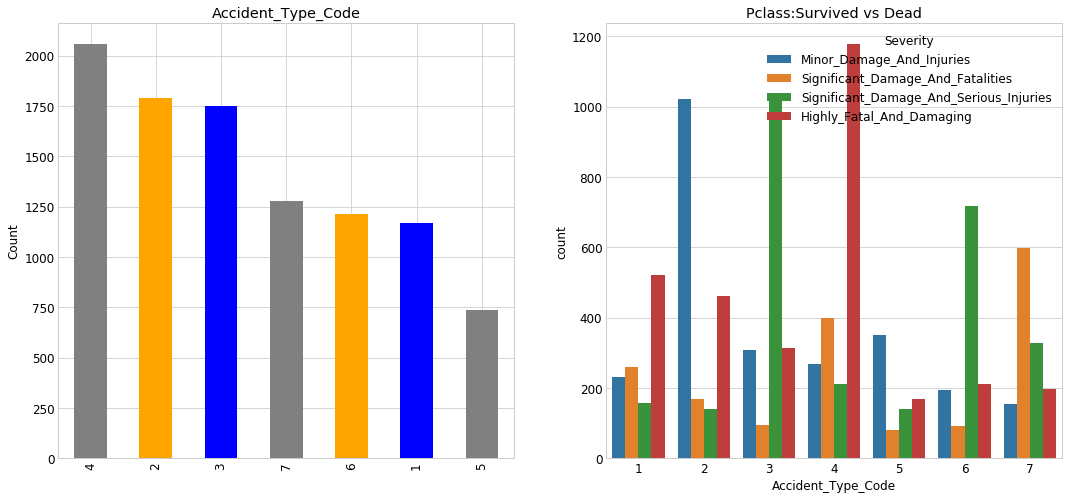

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Accident_Type_Code'].value_counts().plot.bar(color=['grey','orange','blue'],ax=ax[0])
ax[0].set_title('Accident_Type_Code')
ax[0].set_ylabel('Count')
sns.countplot('Accident_Type_Code',hue='Severity',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

##### Inference: The second plot can be used to help generate new features like (Accident_Type_Code == 7)

## Feature Engineering

In [15]:
X_test = test.drop(columns=['Accident_ID'])
concat = pd.concat(objs=[X, X_test], axis=0)
concat['Type_7_acc'] = (concat.Accident_Type_Code == 7)
concat['More_than_2_violations'] = (concat.Violations>2)
concat['Safety_score/Days_since_inspection'] = concat.Safety_Score/(concat.Days_Since_Inspection)
concat.drop(columns=['Violations', 'Max_Elevation', 'Adverse_Weather_Metric', 
                     'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code'], inplace=True)

ss = StandardScaler()
concat = ss.fit_transform(concat)

X, X_test = concat[:len(train), :], concat[len(train):, :]

## Experimenting with Models

##### All the hyperparameters are tuned manually, basically the approach I follow is learn about the model and hyperparameters and then tune them with trial and error. It is much faster than grid search and much reliable than randomized search

### 1) Random Forest

In [16]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=10, max_features=0.5 , bootstrap=False)
cross_val_score(rfc, X, y, cv=4, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   12.6s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.0s finished


0.9658990183396956

##### Move to the top and see the difference in scores with respect to the baseline.

### 2) Multi Layer Perceptron

In [17]:
nnc = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=300,activation = 'relu',solver='adam', 
                           random_state=1, batch_size=50)
cross_val_score(nnc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


0.934416375673176

### 3) K-Neighbours Classifier

In [18]:
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
cross_val_score(knc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


0.8809628487375167

### 4) LightGBM

In [19]:
lgbmc = LGBMClassifier(random_state=2, n_estimators=100, colsample_bytree=0.6, 
                       max_depth=10, learning_rate=0.5, boosting_type='gbdt')
cross_val_score(lgbmc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


0.966072292932477

### 5) XGBoost

In [20]:
xgbc = XGBClassifier(seed=7, n_jobs=-1, n_estimators=900, random_state=0, max_depth=7, learning_rate=0.7)
cross_val_score(xgbc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.6s finished


0.9714944545167139

## The Ensemble

##### The Ensemble is used to decrease overfit and to make sure that none of the scores above were a lucky guess and won't work on the test.

In [21]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('xgbc', xgbc), ('knc', knc),
                                        ('nnc', nnc), ('lgbmc', lgbmc)],
                                         voting='soft', n_jobs=-1)
cross_val_score(ensemble, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


0.9687868426965119

## Predicting Time

In [22]:
ensemble.fit(X, y)
y_pred = ensemble.predict(X_test)
y_pred = pd.Series(y_pred).astype(str).str.replace('0', 'Minor_Damage_And_Injuries').str.replace('1', 'Significant_Damage_And_Serious_Injuries').str.replace('2', 'Significant_Damage_And_Fatalities').str.replace('3', 'Highly_Fatal_And_Damaging')
sub = pd.DataFrame(data={'Accident_ID' : test.Accident_ID, 'Severity' : y_pred})
sub.to_csv('final_pred.csv', index=False)